In [5]:
!pip install pandas matplotlib openpyxl

  Using cached pandas-2.3.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.10.7-cp313-cp313-win_amd64.whl.metadata (11 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ----------------- ---------------------- 4.7/11.0 MB 24.5 MB/s eta 0:00:01
   ------------------------------------ --- 10.0/11.0 MB 21.9 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 18.1 MB/s  0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -------------------------------- ------- 6.6/8.1 MB 31.6 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 23.3 MB/s  0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 23.3 MB/s  0:00:00
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ------------------ --------------------- 5.8/12.8 MB 33.1 MB/s eta 0:00:01
   ------------------------------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

#Carga del dataframe combinado
combined = pd.read_excel("C:/Users/joser/Downloads/datos_combinados.xlsx")

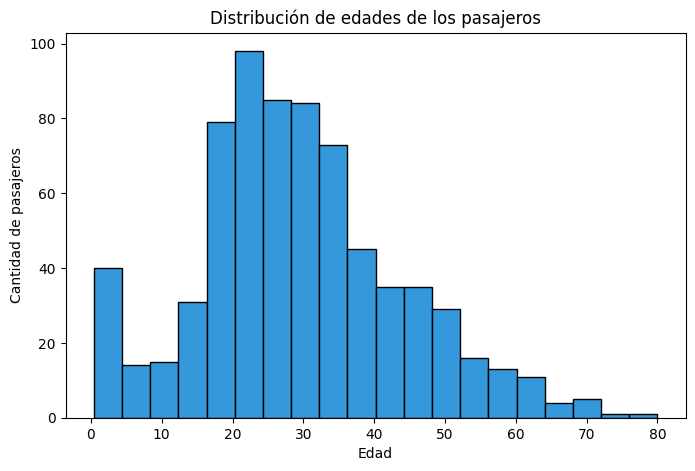

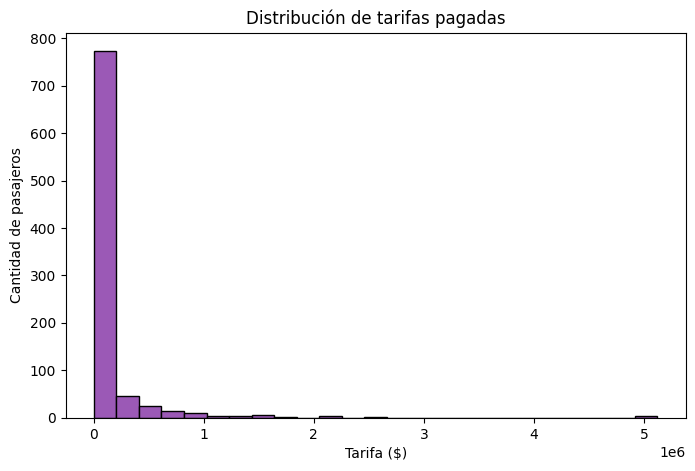

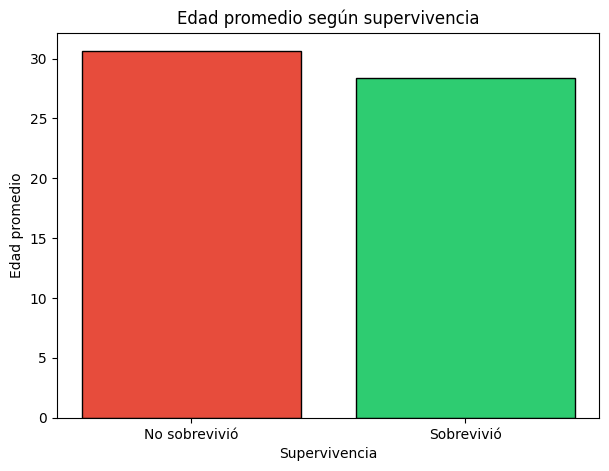

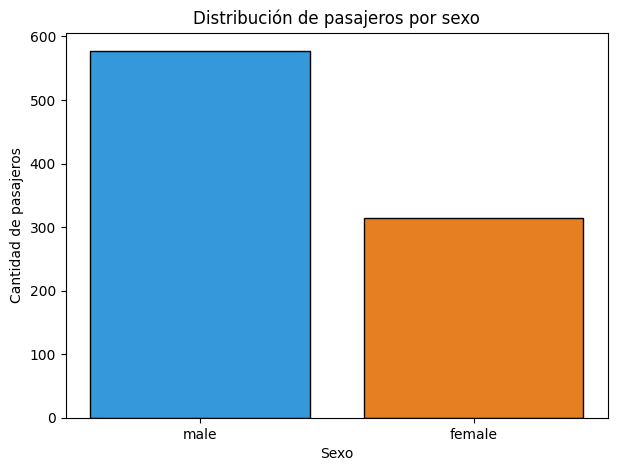

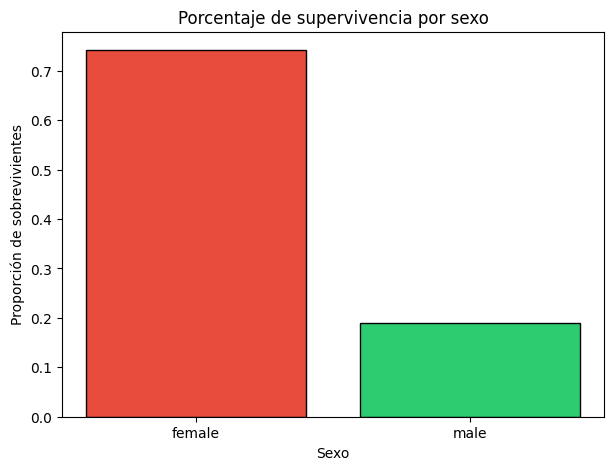

In [9]:
datos = combined.copy() #Se hace una copia de la base combinada y se nombra como datos 

# Usamos solo los datos con información de supervivencia
DataFrame = datos[datos['Survived'].notna()]

# Histograma de edades
plt.figure(figsize=(8,5))
plt.hist(DataFrame["Age"].dropna(), bins=20, color="#3498db", edgecolor="black")
plt.title("Distribución de edades de los pasajeros")
plt.xlabel("Edad")
plt.ylabel("Cantidad de pasajeros")
plt.show()
# La mayoría de los pasajeros tenían entre 20 y 40 años.

# Histograma de tarifas
plt.figure(figsize=(8,5))
plt.hist(DataFrame["Fare"].dropna(), bins=25, color="#9b59b6", edgecolor="black")
plt.title("Distribución de tarifas pagadas")
plt.xlabel("Tarifa ($)")
plt.ylabel("Cantidad de pasajeros")
plt.show()
# La mayoría de las tarifas fueron bajas, típicas de pasajeros de tercera clase.

# Gráfico de barras: promedio de edad según supervivencia
plt.figure(figsize=(7,5))
edades = DataFrame.groupby("Survived")["Age"].mean()
plt.bar(["No sobrevivió", "Sobrevivió"], edades, color=["#e74c3c", "#2ecc71"], edgecolor="black")
plt.title("Edad promedio según supervivencia")
plt.xlabel("Supervivencia")
plt.ylabel("Edad promedio")
plt.show()
# Los sobrevivientes eran un poco más jóvenes en promedio.

# Gráfico de barras: cantidad por sexo
plt.figure(figsize=(7,5))
sexos = DataFrame["Sex"].value_counts()
plt.bar(sexos.index, sexos.values, color=["#3498db", "#e67e22"], edgecolor="black")
plt.title("Distribución de pasajeros por sexo")
plt.xlabel("Sexo")
plt.ylabel("Cantidad de pasajeros")
plt.show()
# Había más hombres que mujeres a bordo.

# Gráfico de barras: porcentaje de supervivencia por sexo
plt.figure(figsize=(7,5))
tasa_sexo = DataFrame.groupby("Sex")["Survived"].mean()
plt.bar(tasa_sexo.index, tasa_sexo.values, color=["#e74c3c", "#2ecc71"], edgecolor="black")
plt.title("Porcentaje de supervivencia por sexo")
plt.xlabel("Sexo")
plt.ylabel("Proporción de sobrevivientes")
plt.show()
# Las mujeres tuvieron una tasa de supervivencia más alta.

In [6]:
train = pd.read_excel("C:/Users/joser/Downloads/train.csv.xlsx")
test = pd.read_excel("C:/Users/joser/Downloads/test.csv.xlsx")

In [8]:
!pip install seaborn


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket       Fare Cabin Embarked  
0      0         A/5 21171       7.25   NaN        S  
1      0          PC 17599  712833.00   C85        C  
2      0  STON/O2. 3101282    7925.00   NaN        S  
3      0            113803      53.10  C123        S  
4      0            373450       8.05   NaN  

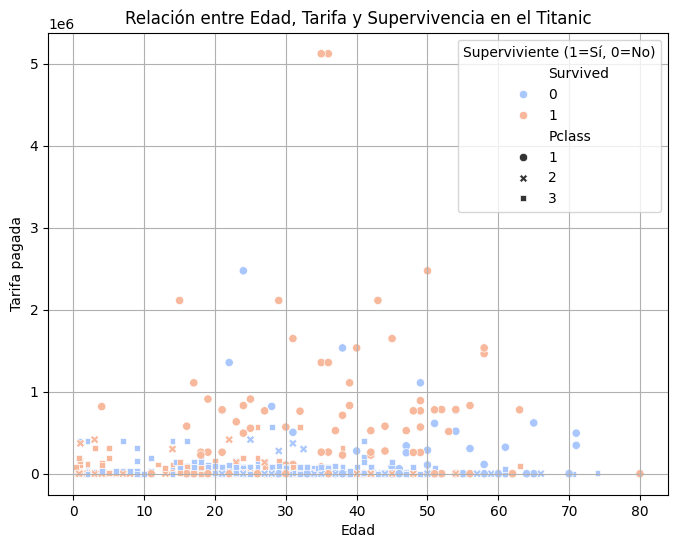

In [10]:

import seaborn as sns

# Mostrar las primeras filas para verificar la estructura
print(train.head())

# Crear un scatterplot para analizar la relación entre edad, tarifa y supervivencia
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=train,
    x="Age",                # Edad del pasajero
    y="Fare",               # Tarifa pagada
    hue="Survived",         # Color según si sobrevivió o no
    style="Pclass",         # Estilo de punto según la clase del pasajero
    palette="coolwarm"
)

# Personalizar el gráfico
plt.title("Relación entre Edad, Tarifa y Supervivencia en el Titanic")
plt.xlabel("Edad")
plt.ylabel("Tarifa pagada")
plt.legend(title="Superviviente (1=Sí, 0=No)")
plt.grid(True)


# Mostrar en pantalla
plt.show()


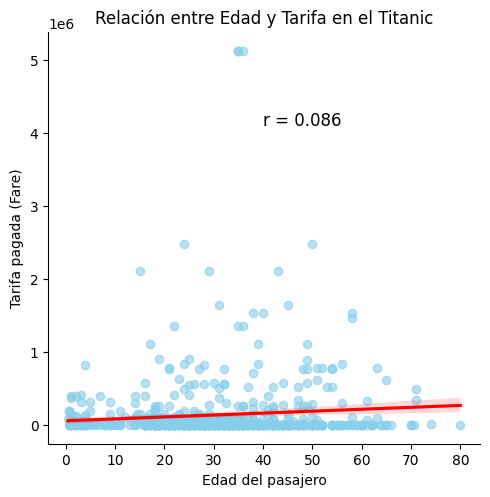

In [14]:
r = train["Age"].corr(train["Fare"])

# Crear el scatterplot con línea de regresión
sns.lmplot(
    x="Age",
    y="Fare",
    data=train,
    scatter_kws={"color": "skyblue", "alpha": 0.6},
    line_kws={"color": "red"}
)

# Personalizar el gráfico
plt.title("Relación entre Edad y Tarifa en el Titanic")
plt.xlabel("Edad del pasajero")
plt.ylabel("Tarifa pagada (Fare)")

# Mostrar el valor de r en el gráfico
plt.text(
    x=train["Age"].max() * 0.5,
    y=train["Fare"].max() * 0.8,
    s=f"r = {r:.3f}",
    fontsize=12,
    color="black"
)

# Mostrar gráfico
plt.show()

C:\Users\joser\AppData\Local\Temp\ipykernel_18264\2331460694.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = train.groupby("Grupo_Tarifa")["Survived"].sum().reset_index()


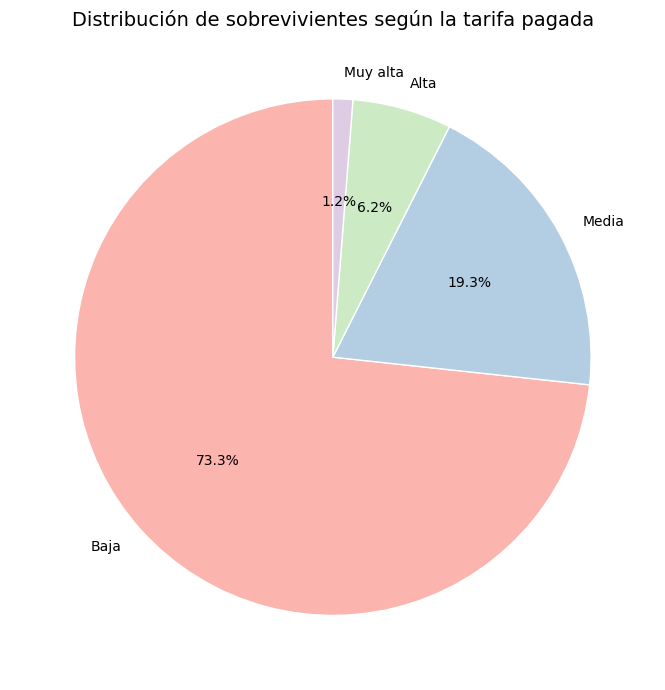

In [17]:
# Eliminar valores faltantes
train = train.dropna(subset=["Fare", "Survived"])

# Crear categorías de tarifa
train["Grupo_Tarifa"] = pd.cut(
    train["Fare"],
    bins=[0, 50, 100, 200, 600],
    labels=["Baja", "Media", "Alta", "Muy alta"]
)

# Calcular cantidad de sobrevivientes por grupo de tarifa
tabla = train.groupby("Grupo_Tarifa")["Survived"].sum().reset_index()

# Crear gráfico circular
plt.figure(figsize=(7,7))
plt.pie(
    tabla["Survived"],
    labels=tabla["Grupo_Tarifa"],
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Pastel1.colors,
    wedgeprops={'edgecolor': 'white'}
)

# Título
plt.title("Distribución de sobrevivientes según la tarifa pagada", fontsize=14)
plt.tight_layout()
plt.show()


C:\Users\joser\AppData\Local\Temp\ipykernel_18264\21287155.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos["Grupo_Tarifa"] = pd.cut(
C:\Users\joser\AppData\Local\Temp\ipykernel_18264\21287155.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tabla = datos.groupby("Grupo_Tarifa")["Survived"].sum().reset_index()


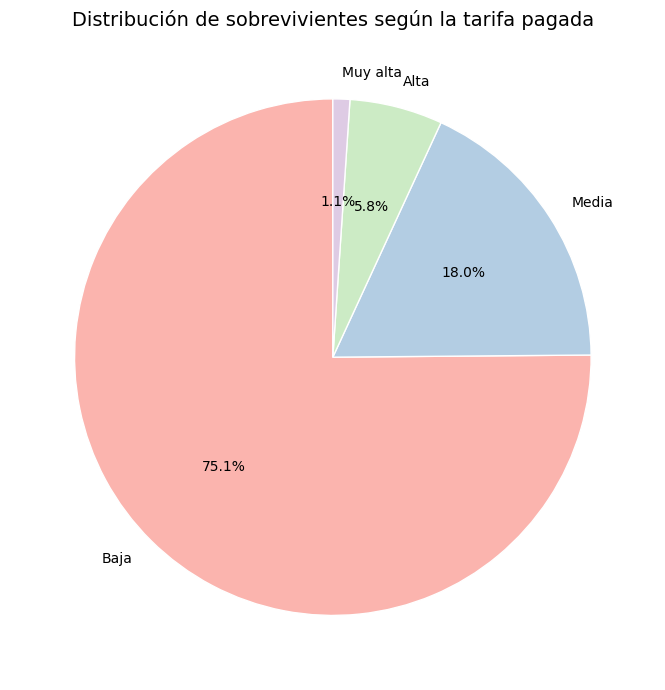

In [18]:

# Filtrar solo las filas con valor de Survived (las del train)
datos = combined.dropna(subset=["Fare", "Survived"])

# Crear grupos de tarifa
datos["Grupo_Tarifa"] = pd.cut(
    datos["Fare"],
    bins=[0, 50, 100, 200, 600],
    labels=["Baja", "Media", "Alta", "Muy alta"]
)

# Calcular cantidad de sobrevivientes por grupo de tarifa
tabla = datos.groupby("Grupo_Tarifa")["Survived"].sum().reset_index()

# Gráfico circular
plt.figure(figsize=(7,7))
plt.pie(
    tabla["Survived"],
    labels=tabla["Grupo_Tarifa"],
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Pastel1.colors,
    wedgeprops={'edgecolor':'white'}
)

plt.title("Distribución de sobrevivientes según la tarifa pagada", fontsize=14)
plt.tight_layout()
plt.show()